# **TikTok Project**
**Exploratory Data Analysis**

Your TikTok data team is still in the early stages of their latest project. So far, you’ve completed a project proposal and used Python to inspect and organize the TikTok dataset.

The management team asked to see a Python notebook showing data structuring and cleaning, as well as any matplotlib/seaborn visualizations plotted to help us understand the data. At the very least, include a graph comparing claim counts to opinion counts, as well as boxplots of the most important variables (like “video duration,” “video like count,” “video comment count,” and “video view count”) to check for outliers. Also, include a breakdown of “author ban status” counts.



# **Exploratory data analysis**

In this activity, we will examine data provided and prepare it for analysis. Also we will design a professional data visualization that tells a story, and will help data-driven decisions for business needs.


**The purpose** of this project is to conduct exploratory data analysis on a provided data set. Your mission is to continue the investigation you began in C2 and perform further EDA on this data with the aim of learning more about the variables. Of particular interest is information related to what distinguishes claim videos from opinion videos.

**The goal** is to explore the dataset and create visualizations.
<br/>
*This activity has 4 parts:*

**Part 1:** Imports, links, and loading

**Part 2:** Data Exploration
*   Data cleaning


**Part 3:** Build visualizations

**Part 4:** Evaluate and share results

# **Visualize a story in Tableau and Python**

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**

Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## **PACE: Plan**

Consider the questions in your PACE Strategy Document and those below where applicable to craft your response:
1. Identify any outliers:


*   What methods are best for identifying outliers?
*   How do you make the decision to keep or exclude outliers from any future models?



*  The best method for identifying outliers are using box plot visualization. Analysing the distribution of data using mean and median helps in identifying the presence of potential outliers. 
* There are three main options for dealing with outliers: keeping them as they are, deleting them, or reassigning them. 
     * Delete them: If you are sure the outliers are mistakes, typos, or errors and the dataset will be used for modeling or machine learning, then you are more likely to decide to delete outliers. Of the three choices, you’ll use this one the least.
     * Reassign them: If the dataset is small and/or the data will be used for modeling or machine learning, you are more likely to choose a path of deriving new values to replace the outlier values.
     * Leave them: For a dataset that you plan to do EDA/analysis on and nothing else, or for a dataset you are preparing for a model that is resistant to outliers, it is most likely that you are going to leave them in.


### 1. Import Packages

In [1]:
# Import packages for data manipulation
### YOUR CODE HERE ###
import numpy as np
import pandas as pd
# Import packages for data visualization
### YOUR CODE HERE ###
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset into dataframe
data = pd.read_csv("tiktok_dataset.csv")

<img src="images/Analyze.png" width="100" height="100" align=left>

## **PACE: Analyze**



### **Task 2a: Data exploration and cleaning**



In [3]:
# Display and examine the first few rows of the dataframe
### YOUR CODE HERE ###
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [4]:
# Get the size of the data
### YOUR CODE HERE ###
data.size

232584

In [5]:
# Get the shape of the data
### YOUR CODE HERE ###
data.shape

(19382, 12)

In [6]:
# Get basic information about the data
### YOUR CODE HERE ###
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [7]:
# Generate a table of descriptive statistics
### YOUR CODE HERE ###
data.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


### **Task 2b. Select visualization type(s)**

Select data visualization types that will help you understand and explain the data.

Now that you know which data columns you’ll use, it is time to decide which data visualization makes the most sense for EDA of the TikTok dataset. What type of data visualization(s) would be most helpful? Consider the distribution of the data.

* Line graph
* Bar chart
* Box plot
* Histogram
* Heat map
* Scatter plot
* A geographic map


The visualizations most helpful for considering the distribution of the data include box plots and histograms. Visualizing the distribution of the data can inform the next steps and considerations in data analysis. For example, data distribution will inform which types of modeling is needed.

<img src="images/Construct.png" width="100" height="100" align=left>

## **PACE: Construct**


### **Task 3. Build visualizations**

Now that you have assessed your data, it’s time to plot your visualization(s).

<Axes: xlabel='video_duration_sec'>

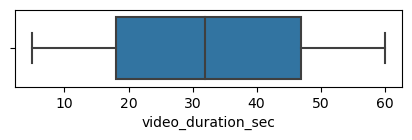

In [8]:
# Create a boxplot to visualize distribution of `video_duration_sec`
### YOUR CODE HERE ###
plt.figure(figsize=(5,1))
sns.boxplot(x='video_duration_sec',data=data)


<Axes: xlabel='video_duration_sec', ylabel='Count'>

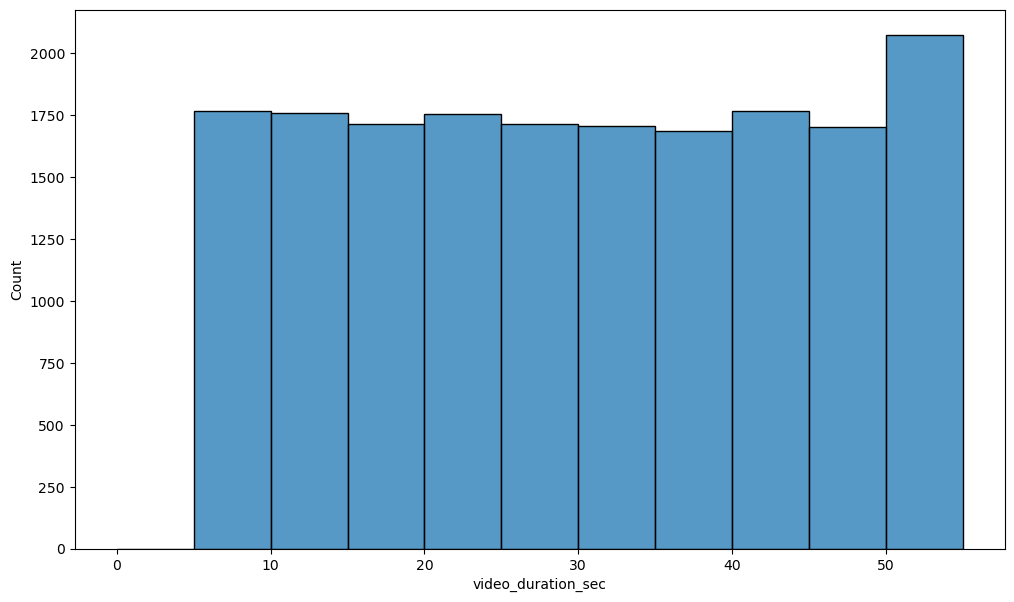

In [9]:
# Create a histogram
### YOUR CODE HERE ###
plt.figure(figsize=(12,7))
sns.histplot(x=data['video_duration_sec'],bins=range(0,60,5))

<Axes: xlabel='video_view_count'>

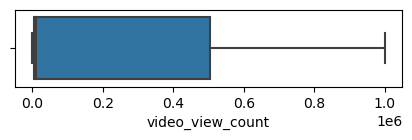

In [10]:
# Create a boxplot to visualize distribution of `video_view_count`
### YOUR CODE HERE ###
plt.figure(figsize=(5,1))
sns.boxplot(x='video_view_count',data=data)


<Axes: xlabel='video_view_count', ylabel='Count'>

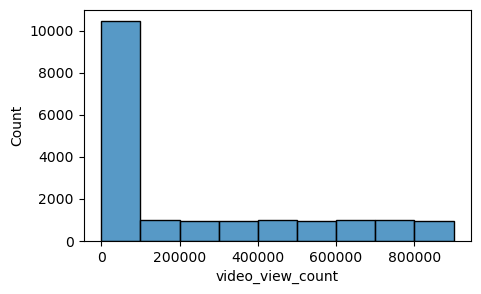

In [11]:
# Create a histogram
### YOUR CODE HERE ###
plt.figure(figsize=(5,3))
sns.histplot(x=data['video_view_count'],bins=range(0,1000000,100000))

<Axes: xlabel='video_like_count'>

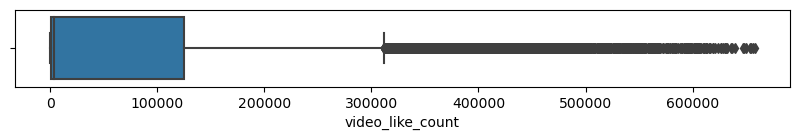

In [12]:
# Create a boxplot to visualize distribution of `video_like_count`
### YOUR CODE HERE ###

plt.figure(figsize=(10,1))
sns.boxplot(x='video_like_count',data=data)

<Axes: xlabel='video_like_count', ylabel='Count'>

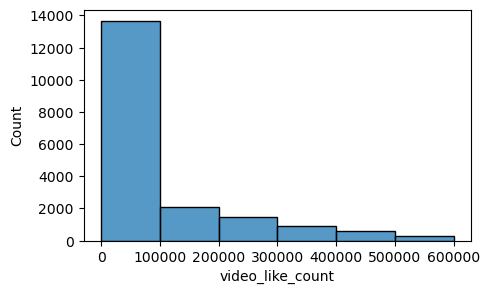

In [13]:
# Create a histogram
### YOUR CODE HERE ###
plt.figure(figsize=(5,3))
sns.histplot(x=data['video_like_count'],bins=range(0,700000,100000))

<Axes: xlabel='video_comment_count'>

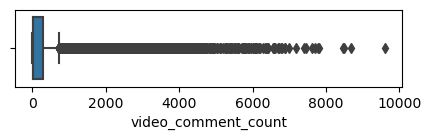

In [14]:
# Create a boxplot to visualize distribution of `video_comment_count`
### YOUR CODE HERE ###

plt.figure(figsize=(5,1))
sns.boxplot(x='video_comment_count',data=data)

<Axes: xlabel='video_comment_count', ylabel='Count'>

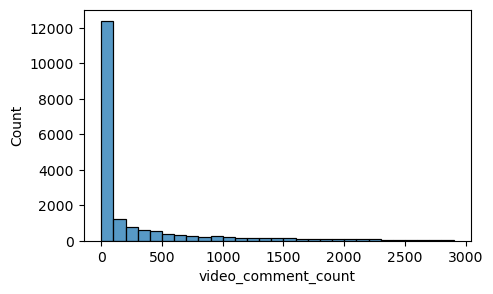

In [15]:
# Create a histogram
### YOUR CODE HERE ###
plt.figure(figsize=(5,3))
sns.histplot(x=data['video_comment_count'],bins=range(0,3000,100))

<Axes: xlabel='video_share_count'>

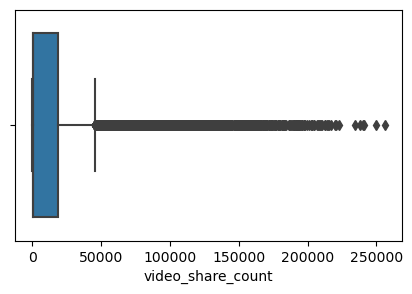

In [16]:
# Create a boxplot to visualize distribution of `video_share_count`
### YOUR CODE HERE ###
plt.figure(figsize=(5,3))
sns.boxplot(x='video_share_count',data=data)

<Axes: xlabel='video_share_count', ylabel='Count'>

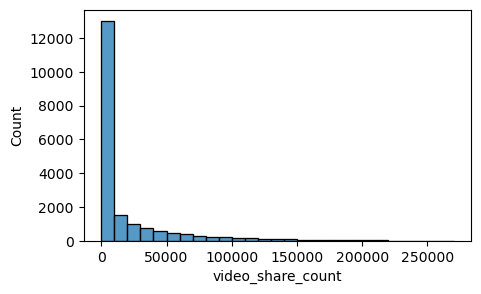

In [17]:
# Create a histogram
### YOUR CODE HERE ###
plt.figure(figsize=(5,3))
sns.histplot(x=data['video_share_count'],bins=range(0,270001,10000))

<Axes: xlabel='video_download_count'>

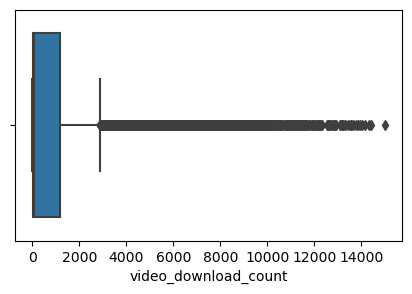

In [18]:
# Create a boxplot to visualize distribution of `video_download_count`
### YOUR CODE HERE ###
plt.figure(figsize=(5,3))
sns.boxplot(x='video_download_count',data=data)

<Axes: xlabel='video_download_count', ylabel='Count'>

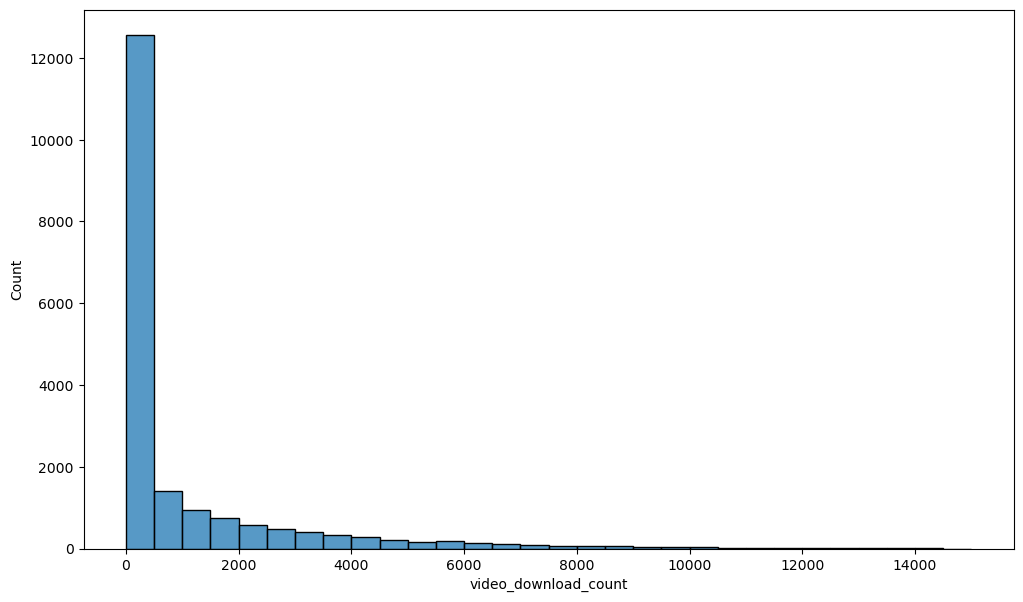

In [19]:
# Create a histogram
### YOUR CODE HERE ###
plt.figure(figsize=(12,7))
sns.histplot(x=data['video_download_count'],bins=range(0,15001,500))

#### **Claim status by verification status**



<Axes: xlabel='claim_status', ylabel='Count'>

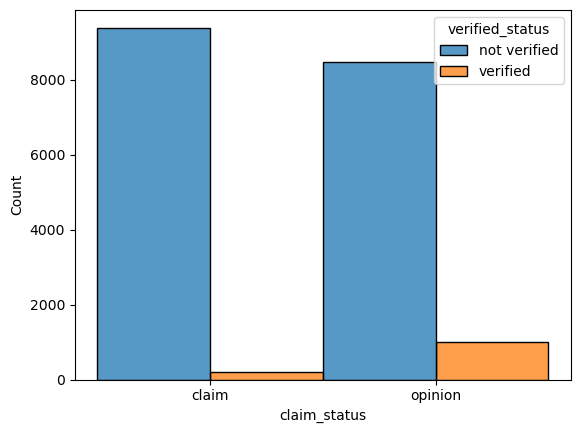

In [20]:
# Create a histogram
### YOUR CODE HERE ###
sns.histplot(data=data,x='claim_status',hue='verified_status',multiple='dodge')

#### **Claim status by author ban status**


<Axes: xlabel='claim_status', ylabel='Count'>

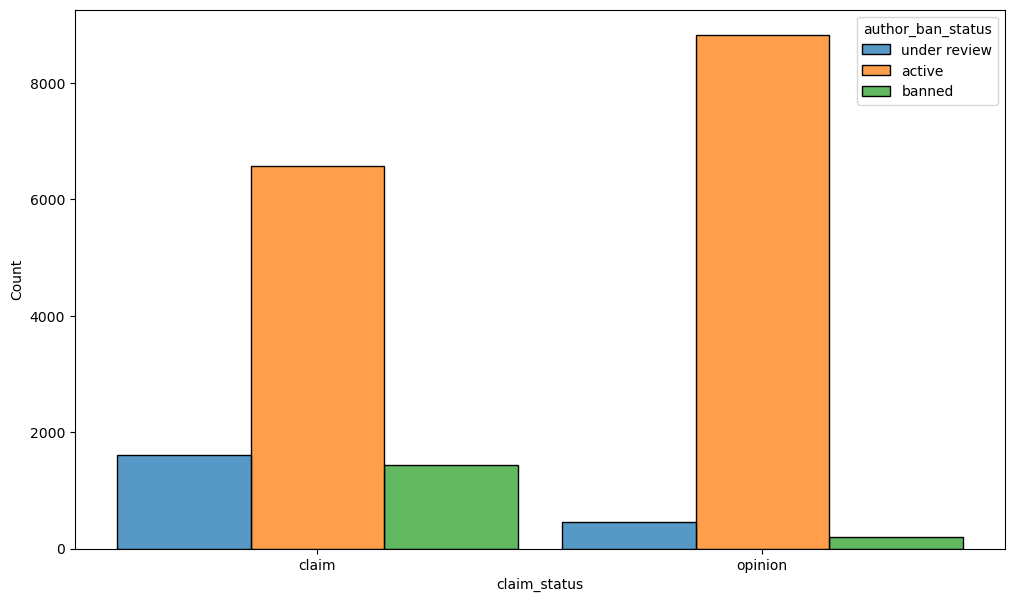

In [21]:
# Create a histogram
### YOUR CODE HERE ###
plt.figure(figsize=(12,7))
sns.histplot(data=data,x='claim_status',hue='author_ban_status',multiple='dodge',shrink=0.9)

#### **Median view counts by ban status**



<Axes: xlabel='author_ban_status', ylabel='video_view_count'>

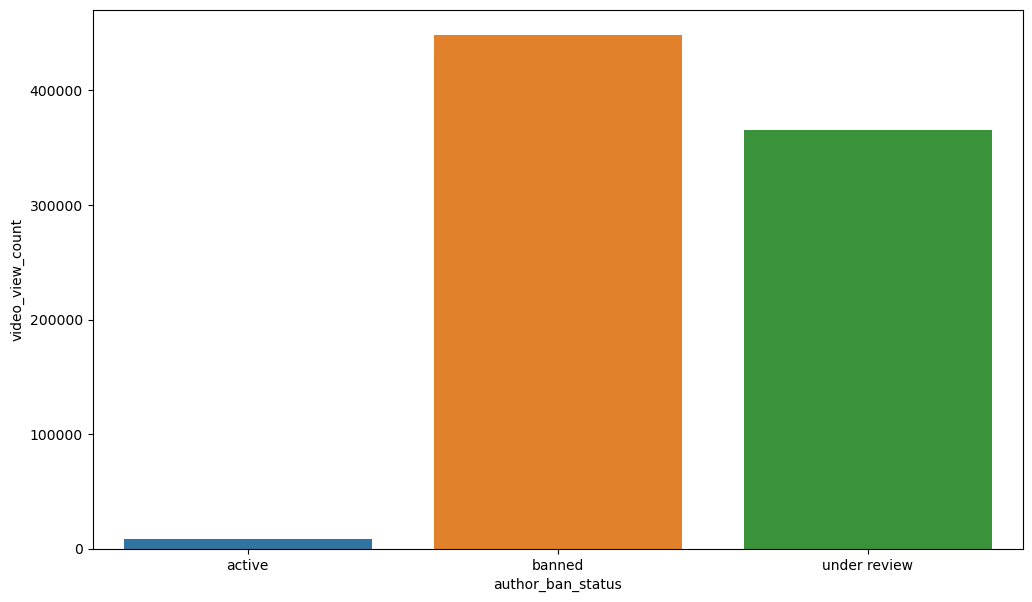

In [22]:
# Create a bar plot
### YOUR CODE HERE ###
ban_status = data.groupby(['author_ban_status']).median(numeric_only = True).reset_index()
plt.figure(figsize=(12,7))
sns.barplot(data=ban_status,x='author_ban_status',y='video_view_count')

In [23]:
# Calculate the median view count for claim status.
### YOUR CODE HERE ###
claim_status = data.groupby(['claim_status']).median()[['video_view_count']]
claim_status

C:\Users\91892\AppData\Local\Temp\ipykernel_25872\2056692834.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  claim_status = data.groupby(['claim_status']).median()[['video_view_count']]


,video_view_count
claim_status,
claim,501555.0
opinion,4953.0


In [24]:
### YOUR CODE HERE ###
total = data.groupby(['claim_status']).sum()

C:\Users\91892\AppData\Local\Temp\ipykernel_25872\2790762838.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total = data.groupby(['claim_status']).sum()


#### **Total views by claim status**



([<matplotlib.patches.Wedge at 0x1c6492bced0>,
 [Text(-1.0994932510793276, 0.033385488329672315, 'claim'),
  Text(1.0994932496141194, -0.033385536583728705, 'opinion')])

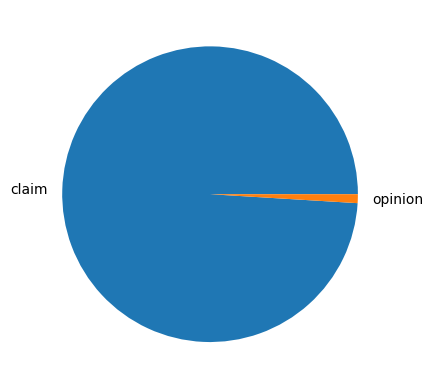

In [25]:
# Create a pie graph
### YOUR CODE HERE ###
plt.pie(x=total['video_view_count'],labels=['claim','opinion'])

### **Task 4. Determine outliers**

When building predictive models, the presence of outliers can be problematic. For example, if you were trying to predict the view count of a particular video, videos with extremely high view counts might introduce bias to a model. Also, some outliers might indicate problems with how data was captured or recorded.

The ultimate objective of the TikTok project is to build a model that predicts whether a video is a claim or opinion. The analysis you've performed indicates that a video's engagement level is strongly correlated with its claim status. There's no reason to believe that any of the values in the TikTok data are erroneously captured, and they align with expectation of how social media works: a very small proportion of videos get super high engagement levels. That's the nature of viral content.

Nonetheless, it's good practice to get a sense of just how many of your data points could be considered outliers. The definition of an outlier can change based on the details of your project, and it helps to have domain expertise to decide a threshold. You've learned that a common way to determine outliers in a normal distribution is to calculate the interquartile range (IQR) and set a threshold that is 1.5 * IQR above the 3rd quartile.

In this TikTok dataset, the values for the count variables are not normally distributed. They are heavily skewed to the right. One way of modifying the outlier threshold is by calculating the **median** value for each variable and then adding 1.5 * IQR. This results in a threshold that is, in this case, much lower than it would be if you used the 3rd quartile.

Write a for loop that iterates over the column names of each count variable. 

In [26]:
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [27]:
### YOUR CODE HERE ###
cols = ['video_view_count','video_like_count','video_share_count','video_download_count','video_comment_count']
for column in cols:
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    median = data[column].median()
    out_thresh = median + 1.5*iqr
    
    out_count = (data[column]>out_thresh).sum()
    print(f'Number of outliers, {column}:',out_count)


Number of outliers, video_view_count: 2343
Number of outliers, video_like_count: 3468
Number of outliers, video_share_count: 3732
Number of outliers, video_download_count: 3733
Number of outliers, video_comment_count: 3882


#### **Scatterplot**

<Axes: xlabel='video_view_count', ylabel='video_like_count'>

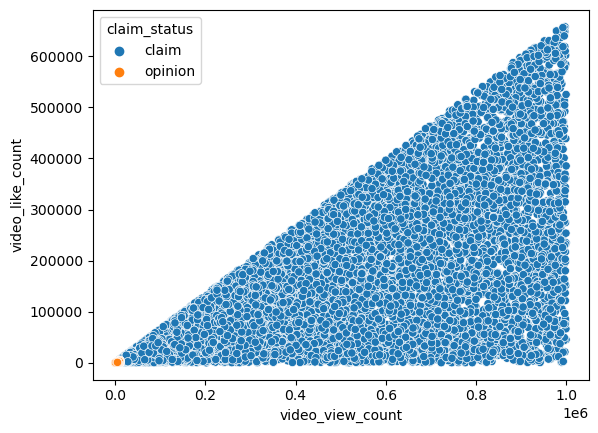

In [28]:
# Create a scatterplot of `video_view_count` versus `video_like_count` according to 'claim_status'
### YOUR CODE HERE ###
sns.scatterplot(data=data,x='video_view_count',y='video_like_count',hue='claim_status')

<Axes: xlabel='video_view_count', ylabel='video_like_count'>

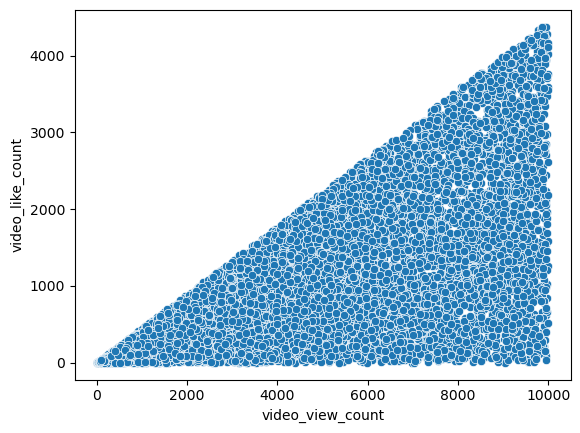

In [29]:
# Create a scatterplot of ``video_view_count` versus `video_like_count` for opinions only
### YOUR CODE HERE ###
op = data[data['claim_status']=='opinion']
sns.scatterplot(data=op,x='video_view_count',y='video_like_count')

<img src="images/Execute.png" width="100" height="100" align=left>

## **PACE: Execute**



### **Task 5a. Results and evaluation**

Having built visualizations in Python, what have you learned about the dataset? What other questions have your visualizations uncovered that you should pursue?



I have learned ....

* *I examined the data distribution/spread, count frequencies, mean and median values, extreme values/outliers, missing data, and more. I analyzed correlations between variables, particularly between the claim_status variable and others.*

My other questions are ....

* *I want to further investigate distinctive characteristics that apply only to claims or only to opinions. Also, I want to consider other variables that might be helpful in understanding the data.*

My client would likely want to know ...

* *My client would want to know the assumptions regarding what data might be predictive of claim_status.*

### **Task 5b. Conclusion**

Why is it important to conduct Exploratory Data Analysis? What other visuals could you create?


EDA is important because ...

* *EDA helps a data professional to get to know the data, understand its outliers, clean its missing values, and prepare it for future modeling.*

Visualizations helped me understand ..

* *That we will need to make decisions on certain considerations prior to designing a model. (for example, what to do with outliers, duplicate values, or missing data)*